In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16, 4)


# Define the start date and end date
start_date = '1990-01-01'
end_date = '2023-12-31'

# Generate a sequence of dates from the start date to the end date
dates = pd.date_range(start=start_date, end=end_date)

# Create a pandas DataFrame with the dates as the index and the sales volume as the data
df = pd.DataFrame(index=dates, columns=['Sales Volume'])
df['Date'] = dates

# Generate random sales volume data between 500 and 100
df['Sales Volume'] = np.random.randint(low=500, high=1000, size=len(df))

df = df[['Date','Sales Volume']]
df.head()

,Date,Sales Volume
1990-01-01,1990-01-01,807
1990-01-02,1990-01-02,791
1990-01-03,1990-01-03,783
1990-01-04,1990-01-04,553
1990-01-05,1990-01-05,609


C:\Users\chandan.sengupta\AppData\Local\Temp\ipykernel_2488\3881280344.py:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_sales = df.resample('MS').mean()


<Figure size 1600x400 with 0 Axes>

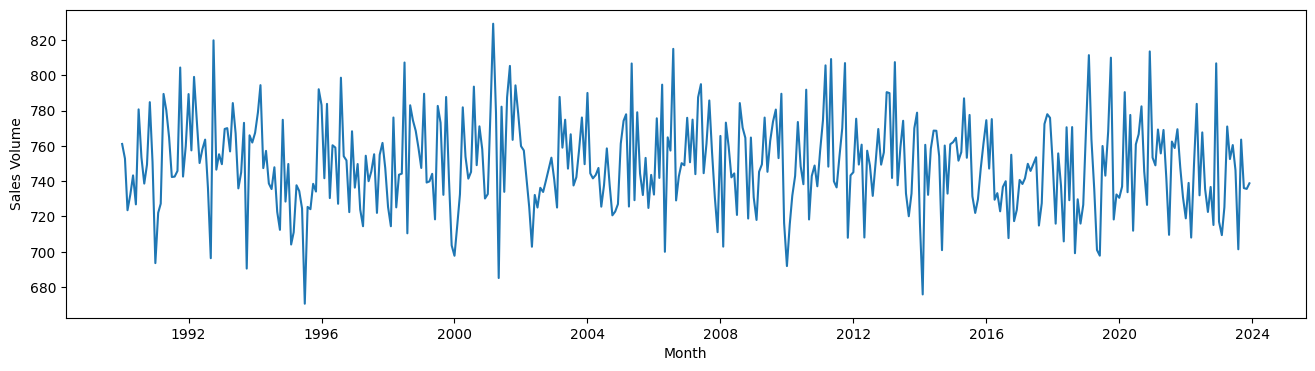

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date']) # assuming 'Date' is a column with dates

# Reset the index
df.reset_index(inplace=True)

# Set the 'Date' column as the index8
df.set_index('Date', inplace=True)

monthly_sales = df.resample('MS').mean()

# Create a figure and an axis
plt.figure(figsize=(16,4))
fig, ax = plt.subplots()

# Create a line chart with the sales volume data
ax.plot(monthly_sales.index, monthly_sales['Sales Volume'])

# Set the x-axis and y-axis labels
ax.set_xlabel('Month')
ax.set_ylabel('Sales Volume')

# Show the plot

plt.show()

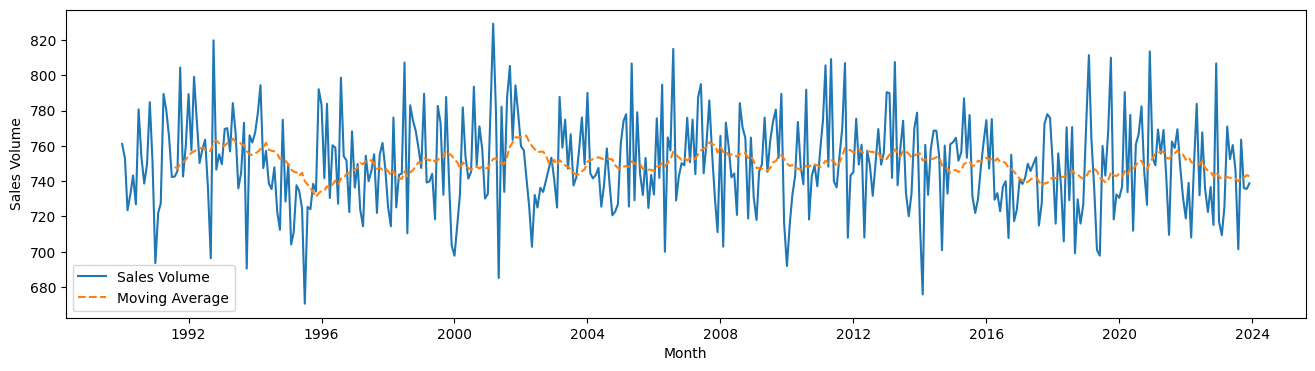

In [28]:
window_size = 20 # replace this with the number of months you want to use for the moving average
monthly_sales['Moving Average'] = monthly_sales['Sales Volume'].rolling(window=window_size).mean()

# Create a figure and an axis
fig, ax = plt.subplots()

# Create a line chart with the sales volume data
ax.plot(monthly_sales.index, monthly_sales['Sales Volume'], label='Sales Volume')

# Create a line chart with the moving average data
ax.plot(monthly_sales.index, monthly_sales['Moving Average'], label='Moving Average', linestyle='--')

# Set the x-axis and y-axis labels
ax.set_xlabel('Month')
ax.set_ylabel('Sales Volume')

# Set the legend
ax.legend()

# Show the plot
plt.show()

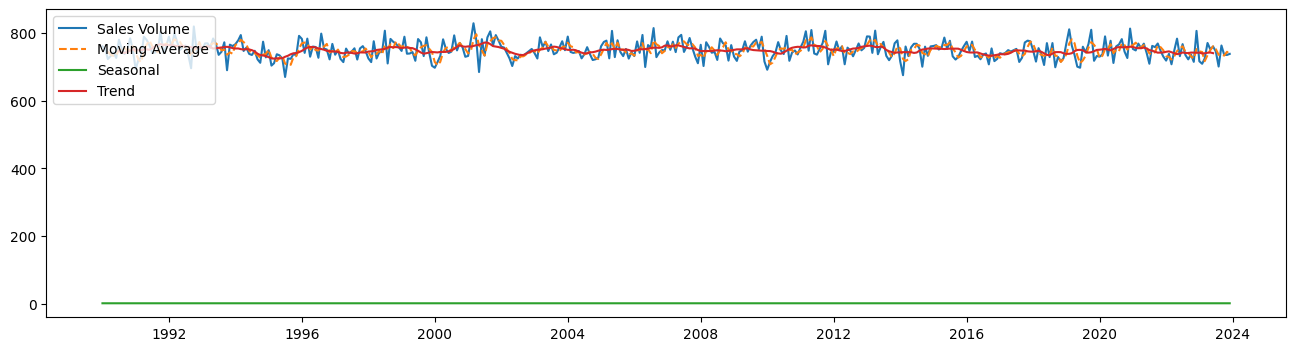

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Calculate the moving average
window_size = 3 # replace this with the number of months you want to use for the moving average
monthly_sales['Moving Average'] = monthly_sales['Sales Volume'].rolling(window=window_size).mean()

# Perform a seasonal decomposition of the data
result = seasonal_decompose(monthly_sales['Sales Volume'], model='multiplicative')

# Create a figure and an axis
fig, ax = plt.subplots()

# Create a line chart with the sales volume data
ax.plot(monthly_sales.index, monthly_sales['Sales Volume'], label='Sales Volume')

# Create a line chart with the moving average data
ax.plot(monthly_sales.index, monthly_sales['Moving Average'], label='Moving Average', linestyle='--')

# Add a legend to the plot
ax.legend(loc='upper left')

# Plot the seasonal component
ax.plot(result.seasonal.index, result.seasonal, label='Seasonal')

# Plot the trend component
ax.plot(result.trend.index, result.trend, label='Trend')

# Add a legend to the plot
ax.legend(loc='upper left')

plt.show()

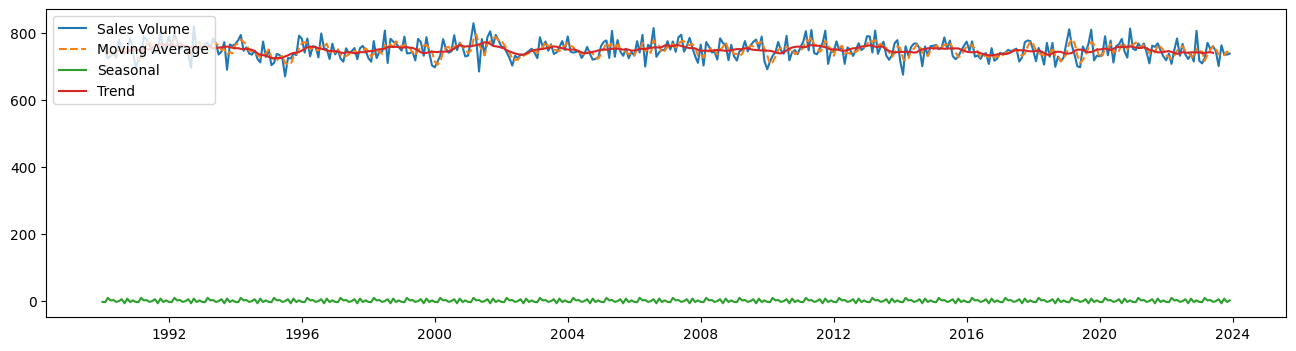

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Calculate the moving average
window_size = 3 # replace this with the number of months you want to use for the moving average
monthly_sales['Moving Average'] = monthly_sales['Sales Volume'].rolling(window=window_size).mean()

# Perform a seasonal decomposition of the data
result = seasonal_decompose(monthly_sales['Sales Volume'], model='additive')

# Create a figure and an axis
fig, ax = plt.subplots()

# Create a line chart with the sales volume data
ax.plot(monthly_sales.index, monthly_sales['Sales Volume'], label='Sales Volume')

# Create a line chart with the moving average data
ax.plot(monthly_sales.index, monthly_sales['Moving Average'], label='Moving Average', linestyle='--')

# Add a legend to the plot
ax.legend(loc='upper left')

# Plot the seasonal component
ax.plot(result.seasonal.index, result.seasonal, label='Seasonal')

# Plot the trend component
ax.plot(result.trend.index, result.trend, label='Trend')

# Add a legend to the plot
ax.legend(loc='upper left')

plt.show()

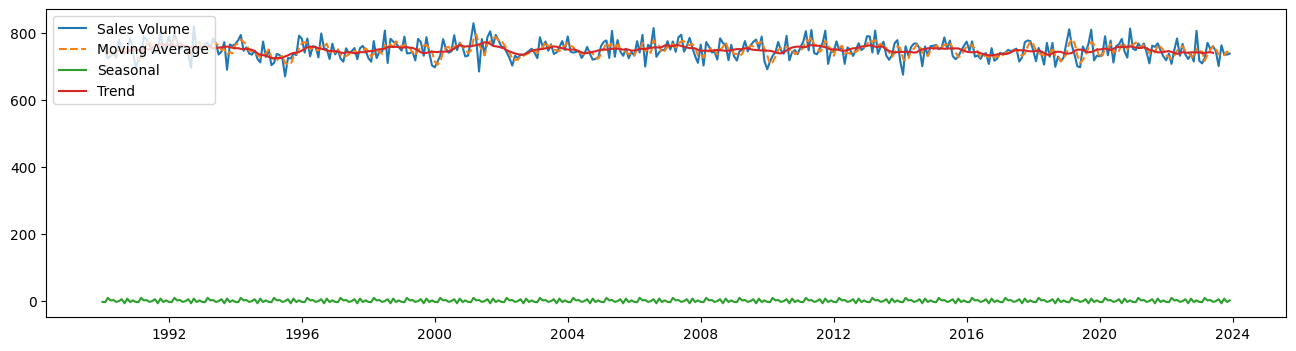

In [33]:
# Calculate the moving average
window_size = 3 # replace this with the number of months you want to use for the moving average
monthly_sales['Moving Average'] = monthly_sales['Sales Volume'].rolling(window=window_size).mean()

# Perform a seasonal decomposition of the data
result = seasonal_decompose(monthly_sales['Sales Volume'], model='seasonal decompose')

# Create a figure and an axis
fig, ax = plt.subplots()

# Create a line chart with the sales volume data
ax.plot(monthly_sales.index, monthly_sales['Sales Volume'], label='Sales Volume')

# Create a line chart with the moving average data
ax.plot(monthly_sales.index, monthly_sales['Moving Average'], label='Moving Average', linestyle='--')

# Add a legend to the plot
ax.legend(loc='upper left')

# Plot the seasonal component
ax.plot(result.seasonal.index, result.seasonal, label='Seasonal')

# Plot the trend component
ax.plot(result.trend.index, result.trend, label='Trend')

# Add a legend to the plot
ax.legend(loc='upper left')

plt.show()

In [31]:
from scipy import stats

def detect_outliers(data):
    z_scores = np.abs(stats.zscore(data))
    return np.where(z_scores > 3)

In [32]:
detect_outliers(df['Sales Volume'])

(array([], dtype=int64),)